In [101]:
from pandore import *
from pandore_jupyter import *

# Régularisation de Tikhonov pour l’inpainting

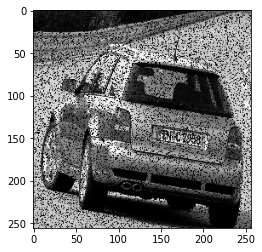

In [138]:
pbmp2pan("auto1.bmp","auto1.pan")
pim2sf("auto1.pan","auto1.pan")
psetcst(0,"auto1.pan","masque.pan")

paddnoise(3,0,1,"masque.pan","masque_noise.pan")

pnormalization(0,1,"masque_noise.pan","masque_noise_normalized.pan")

pbinarization(0.2,1,"masque_noise_normalized.pan","masque_binarized.pan")
pmask("auto1.pan","masque_binarized.pan","masked_auto.pan")
pvisuJG("masked_auto.pan")

In [133]:
def Proj(x,H,S,result):
    pmask(x,H,"res1.pan")
    psub(x,"res1.pan","res2.pan")
    padd(S,"res2.pan",result)

In [134]:
def Tikhonov(mask,masked,u,l):
    psetcst(0, "masked_auto.pan","inpaint_result.pan")
    x = "inpaint_result.pan"
    for k in range(l):  
        plaplacian(4,x,"out1.pan")
        plaplacian(4,"out1.pan","out2.pan")
        pmultcst(u,"out2.pan","out3.pan")
        psub(x,"out3.pan","out4.pan")
        Proj("out4.pan", mask, masked, x)

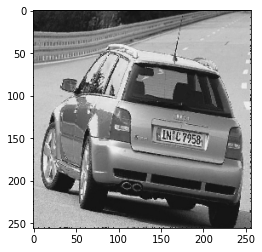

In [135]:
Tikhonov("masque_binarized.pan","masked_auto.pan",0.1,100)
pvisuJG("inpaint_result.pan")

- Plus l'image manque de pixel plus on aura besoin d'agrandir le nombre d'iteration afin d'avoir un resultat meilleur , cependant l'image devient un peu flou .

# Régularisation par la variation totale pour l’inpainting

### Implémentation

In [136]:
def TV(mask,masked,u,e,l):
    psetcst(0,"masked_auto.pan","inpaint_result2.pan")
    x = "inpaint_result2.pan"
    for k in range(l):
        pgradneumann(x,"out1.pan","out2.pan")
        pmodulus("out1.pan","out2.pan","modulus.pan")
        ppow(2,"modulus.pan","modulus2.pan")
        paddcst(e,"modulus2.pan","out3.pan")
        psqrt("out3.pan","out4.pan")
        pdiv("out1.pan","out4.pan","out5.pan")
        pdiv("out2.pan","out4.pan","out6.pan")
        pdivneumann("out5.pan","out6.pan","out7.pan")
        pmultcst(u,"out7.pan","out8.pan")
        padd(x,"out8.pan","out9.pan")
        Proj("out9.pan",mask,masked,x)
        

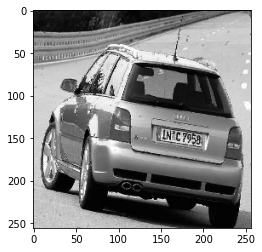

In [94]:
TV("masque_binarized.pan","masked_auto.pan",1,0.01,100)
pvisuJG("inpaint_result2.pan")

- Tikhonov donne une image plus lisse

### Restauration d’une photographie ancienne

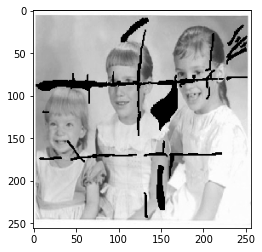

In [107]:
pbmp2pan("girls.bmp","girls.pan")
pim2sf("girls.pan","girls.pan")
pbmp2pan("girls_mask.bmp","girls_mask.pan")
pmask("girls.pan","girls_mask.pan","masked_girls.pan")
pvisuJG("masked_girls.pan")

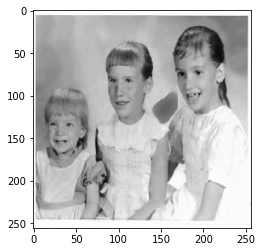

In [111]:
TV("girls_mask.pan","masked_girls.pan",1,0.01,1000)
pvisuJG("inpaint_result2.pan")

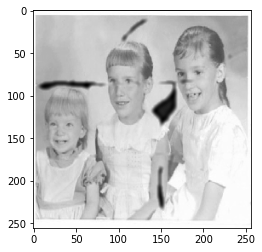

In [112]:
Tikhonov("girls_mask.pan","masked_girls.pan",0.1,1000)
pvisuJG("inpaint_result.pan")

- Pour un meme nombre d'interation la methode TV donne un resultat meilleur.

# Déconvolution

### Implémentation

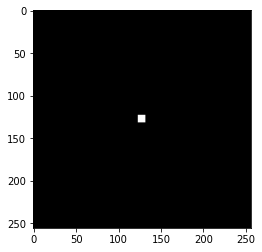

In [125]:
pshapedesign(256, 256, 0, 2, 9, 9, "square.pan")
pim2sf("square.pan","square.pan")
pnormalization(0,1,"square.pan","square_normalized.pan")
pvisuJG("square_normalized.pan")

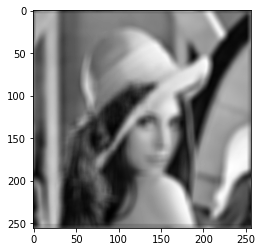

In [127]:
pbmp2pan("lena.bmp","lena.pan")
pim2sf("lena.pan","lena.pan")
pfftconvolution("square_normalized.pan","lena.pan","out_lena.pan")
pvisuJG("out_lena.pan")

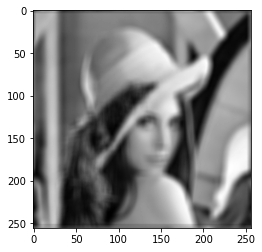

In [131]:
paddnoise(1,0,5,"out_lena.pan","noise_lena.pan")
pvisuJG("noise_lena.pan")

In [ ]:
def convolution():
    